In [1]:
#Imports
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.impute import SimpleImputer
import warnings
warnings.filterwarnings("default")
import seaborn as sns

C:\Users\A801518\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [2]:
df = pd.read_csv('Train.csv')

In [3]:
test=pd.read_csv('Test.csv')

In [4]:
df.head()

,INCIDENT_ID,DATE,X_1,X_2,X_3,X_4,X_5,X_6,X_7,X_8,X_9,X_10,X_11,X_12,X_13,X_14,X_15,MULTIPLE_OFFENSE
0,CR_102659,04-JUL-04,0,36,34,2,1,5,6,1,6,1,174,1.0,92,29,36,0
1,CR_189752,18-JUL-17,1,37,37,0,0,11,17,1,6,1,236,1.0,103,142,34,1
2,CR_184637,15-MAR-17,0,3,2,3,5,1,0,2,3,1,174,1.0,110,93,34,1
3,CR_139071,13-FEB-09,0,33,32,2,1,7,1,1,6,1,249,1.0,72,29,34,1
4,CR_109335,13-APR-05,0,33,32,2,1,8,3,0,5,1,174,0.0,112,29,43,1


In [5]:
test.head()

,INCIDENT_ID,DATE,X_1,X_2,X_3,X_4,X_5,X_6,X_7,X_8,X_9,X_10,X_11,X_12,X_13,X_14,X_15
0,CR_195453,01-FEB-18,0,30,35,7,3,6,4,0,5,1,174,NaN,72,119,23
1,CR_103520,05-MAR-04,0,44,44,1,3,7,1,4,6,1,316,0.0,12,29,34
2,CR_196089,27-JAN-18,0,34,33,3,5,2,7,3,0,1,316,1.0,72,0,34
3,CR_112195,18-AUG-06,7,3,2,3,5,9,8,0,5,1,174,1.0,112,87,34
4,CR_149832,31-OCT-11,0,7,8,7,3,2,7,1,5,1,174,0.0,112,93,43


# Findings

In [6]:
df.describe()

,X_1,X_2,X_3,X_4,X_5,X_6,X_7,X_8,X_9,X_10,X_11,X_12,X_13,X_14,X_15,MULTIPLE_OFFENSE
count,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23674.000000,23856.000000,23856.000000,23856.000000,23856.000000
mean,0.483778,24.791206,24.637450,4.276744,2.455609,6.154175,4.876509,0.972460,4.924128,1.244802,206.954519,0.974064,85.237383,72.674296,33.464747,0.955231
std,1.439738,15.240231,15.135093,2.944672,1.963095,4.471756,3.881931,1.453144,1.362625,1.119301,93.033348,1.167725,27.597226,43.297320,8.386834,0.206800
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,7.000000,8.000000,2.000000,1.000000,3.000000,2.000000,0.000000,5.000000,1.000000,174.000000,1.000000,72.000000,29.000000,34.000000,1.000000
50%,0.000000,24.000000,24.000000,4.000000,3.000000,5.000000,4.000000,1.000000,5.000000,1.000000,249.000000,1.000000,98.000000,62.000000,34.000000,1.000000
75%,0.000000,36.000000,35.000000,6.000000,5.000000,8.000000,7.000000,1.000000,6.000000,1.000000,249.000000,1.000000,103.000000,107.000000,34.000000,1.000000
max,7.000000,52.000000,52.000000,10.000000,5.000000,19.000000,18.000000,99.000000,6.000000,90.000000,332.000000,90.000000,116.000000,142.000000,50.000000,1.000000


In [7]:
test.describe()

,X_1,X_2,X_3,X_4,X_5,X_6,X_7,X_8,X_9,X_10,X_11,X_12,X_13,X_14,X_15
count,15903.000000,15903.000000,15903.000000,15903.000000,15903.000000,15903.000000,15903.000000,15903.000000,15903.000000,15903.000000,15903.000000,15776.000000,15903.000000,15903.000000,15903.000000
mean,0.468088,24.722631,24.575049,4.284223,2.448469,6.084890,4.862605,0.986732,4.908759,1.241212,206.954097,0.972236,85.191096,72.218575,33.422625
std,1.412112,15.228841,15.127451,2.974584,1.963372,4.451117,3.854550,1.471274,1.374677,0.841804,93.107783,0.876669,27.493192,43.438227,8.314284
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,7.000000,8.000000,2.000000,1.000000,3.000000,2.000000,0.000000,5.000000,1.000000,174.000000,1.000000,72.000000,29.000000,34.000000
50%,0.000000,24.000000,24.000000,4.000000,3.000000,5.000000,4.000000,1.000000,5.000000,1.000000,249.000000,1.000000,98.000000,62.000000,34.000000
75%,0.000000,36.000000,35.000000,6.000000,5.000000,8.000000,7.000000,1.000000,6.000000,1.000000,249.000000,1.000000,103.000000,107.000000,34.000000
max,7.000000,52.000000,52.000000,10.000000,5.000000,19.000000,18.000000,50.000000,6.000000,40.000000,332.000000,40.000000,117.000000,142.000000,50.000000


#### Seems like X_8 , X_10 , X_12  has outliers when campared with test

In [8]:
df.sort_values(by=['X_8'],ascending=False)["X_8"].head(10)

7054     99
16917    50
14335    30
15670    29
19151    22
14870    21
18001    20
4606     20
21040    20
1874     20
Name: X_8, dtype: int64

In [9]:
test.sort_values(by=['X_8'],ascending=False)["X_8"].head(10)

4505     50
13142    50
187      40
2784     30
1639     25
15372    22
1945     20
5854     20
7710     20
11266    20
Name: X_8, dtype: int64

In [10]:
#df=df[df["X_8"]!=99]

In [11]:
df.sort_values(by=['X_10'],ascending=False)["X_10"].head(10)

2351     90
9729     58
7054     50
17263    40
4616     30
15670    22
12632    20
2774     20
5091     19
9690     18
Name: X_10, dtype: int64

In [12]:
test.sort_values(by=['X_10'],ascending=False)["X_10"].head(10)

7000     40
230      28
6575     20
588      18
10257    15
10369    14
5083     14
15687    12
5670     11
15274    11
Name: X_10, dtype: int64

In [13]:
#df=df[df["X_10"]!=90]
#df=df[df["X_10"]!=58]

In [14]:
df.sort_values(by=['X_12'],ascending=False)["X_12"].head(10)

2351     90.0
9729     58.0
7054     50.0
17263    40.0
4616     30.0
2774     20.0
12632    20.0
20067    17.0
4438     16.0
18640    15.0
Name: X_12, dtype: float64

In [15]:
test.sort_values(by=['X_12'],ascending=False)["X_12"].head(10)

7000     40.0
6575     20.0
588      18.0
10369    14.0
15687    12.0
5670     11.0
15274    11.0
4340     10.0
15848    10.0
949      10.0
Name: X_12, dtype: float64

In [16]:
df.describe()

,X_1,X_2,X_3,X_4,X_5,X_6,X_7,X_8,X_9,X_10,X_11,X_12,X_13,X_14,X_15,MULTIPLE_OFFENSE
count,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23674.000000,23856.000000,23856.000000,23856.000000,23856.000000
mean,0.483778,24.791206,24.637450,4.276744,2.455609,6.154175,4.876509,0.972460,4.924128,1.244802,206.954519,0.974064,85.237383,72.674296,33.464747,0.955231
std,1.439738,15.240231,15.135093,2.944672,1.963095,4.471756,3.881931,1.453144,1.362625,1.119301,93.033348,1.167725,27.597226,43.297320,8.386834,0.206800
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,7.000000,8.000000,2.000000,1.000000,3.000000,2.000000,0.000000,5.000000,1.000000,174.000000,1.000000,72.000000,29.000000,34.000000,1.000000
50%,0.000000,24.000000,24.000000,4.000000,3.000000,5.000000,4.000000,1.000000,5.000000,1.000000,249.000000,1.000000,98.000000,62.000000,34.000000,1.000000
75%,0.000000,36.000000,35.000000,6.000000,5.000000,8.000000,7.000000,1.000000,6.000000,1.000000,249.000000,1.000000,103.000000,107.000000,34.000000,1.000000
max,7.000000,52.000000,52.000000,10.000000,5.000000,19.000000,18.000000,99.000000,6.000000,90.000000,332.000000,90.000000,116.000000,142.000000,50.000000,1.000000


In [17]:
test.describe()

,X_1,X_2,X_3,X_4,X_5,X_6,X_7,X_8,X_9,X_10,X_11,X_12,X_13,X_14,X_15
count,15903.000000,15903.000000,15903.000000,15903.000000,15903.000000,15903.000000,15903.000000,15903.000000,15903.000000,15903.000000,15903.000000,15776.000000,15903.000000,15903.000000,15903.000000
mean,0.468088,24.722631,24.575049,4.284223,2.448469,6.084890,4.862605,0.986732,4.908759,1.241212,206.954097,0.972236,85.191096,72.218575,33.422625
std,1.412112,15.228841,15.127451,2.974584,1.963372,4.451117,3.854550,1.471274,1.374677,0.841804,93.107783,0.876669,27.493192,43.438227,8.314284
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,7.000000,8.000000,2.000000,1.000000,3.000000,2.000000,0.000000,5.000000,1.000000,174.000000,1.000000,72.000000,29.000000,34.000000
50%,0.000000,24.000000,24.000000,4.000000,3.000000,5.000000,4.000000,1.000000,5.000000,1.000000,249.000000,1.000000,98.000000,62.000000,34.000000
75%,0.000000,36.000000,35.000000,6.000000,5.000000,8.000000,7.000000,1.000000,6.000000,1.000000,249.000000,1.000000,103.000000,107.000000,34.000000
max,7.000000,52.000000,52.000000,10.000000,5.000000,19.000000,18.000000,50.000000,6.000000,40.000000,332.000000,40.000000,117.000000,142.000000,50.000000


#### Checking Null's

In [18]:
df.isnull().sum()

INCIDENT_ID           0
DATE                  0
X_1                   0
X_2                   0
X_3                   0
X_4                   0
X_5                   0
X_6                   0
X_7                   0
X_8                   0
X_9                   0
X_10                  0
X_11                  0
X_12                182
X_13                  0
X_14                  0
X_15                  0
MULTIPLE_OFFENSE      0
dtype: int64

In [19]:
# Lets take some feature extraction from date

In [20]:
df['DATE'] = df['DATE'].astype('datetime64[ns]')

In [21]:
df['MONTH'] = df.DATE.dt.month

In [22]:
df['DAY'] = df.DATE.dt.weekday

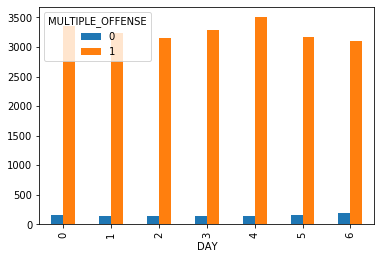

In [23]:
pd.crosstab(df.DAY, df['MULTIPLE_OFFENSE']).plot(kind='bar')

In [24]:
# I can't find Day column relevent, anyways lets see with ratio

In [25]:
a=pd.crosstab(df.DAY, df['MULTIPLE_OFFENSE']).reset_index()
a["%"]=round((a[0]/a[1])*100,2)
a

MULTIPLE_OFFENSE,DAY,0,1,%
0,0,162,3361,4.82
1,1,139,3232,4.30
2,2,139,3153,4.41
3,3,144,3280,4.39
4,4,135,3501,3.86
5,5,163,3167,5.15
6,6,186,3094,6.01


In [26]:
a=pd.crosstab(df.MONTH, df['MULTIPLE_OFFENSE']).reset_index()
a["%"]=round((a[0]/a[1])*100,2)
a

MULTIPLE_OFFENSE,MONTH,0,1,%
0,1,91,1648,5.52
1,2,69,1646,4.19
2,3,85,1905,4.46
3,4,100,2014,4.97
4,5,115,2027,5.67
5,6,97,2016,4.81
6,7,92,2065,4.46
7,8,92,2018,4.56
8,9,78,2212,3.53
9,10,96,2042,4.70


## No significant pattern on date and MULTIPLE_OFFENSE

In [27]:
df.columns

Index(['INCIDENT_ID', 'DATE', 'X_1', 'X_2', 'X_3', 'X_4', 'X_5', 'X_6', 'X_7',
       'X_8', 'X_9', 'X_10', 'X_11', 'X_12', 'X_13', 'X_14', 'X_15',
       'MULTIPLE_OFFENSE', 'MONTH', 'DAY'],
      dtype='object')

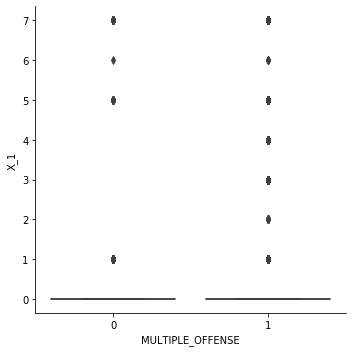

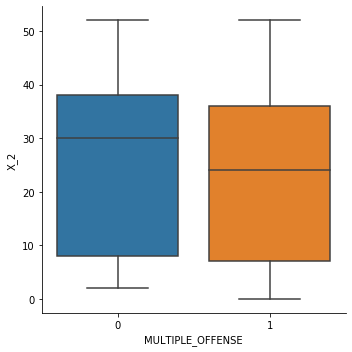

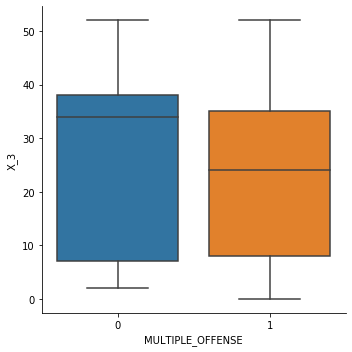

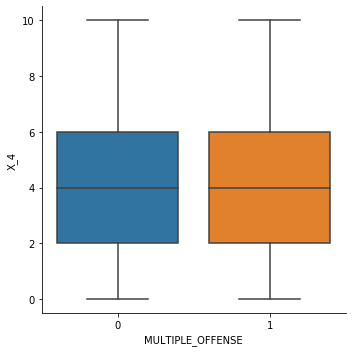

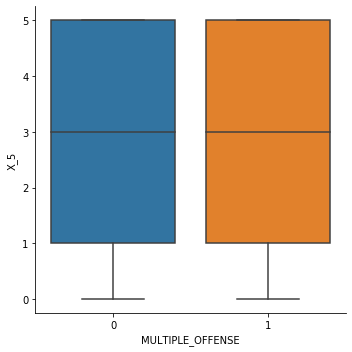

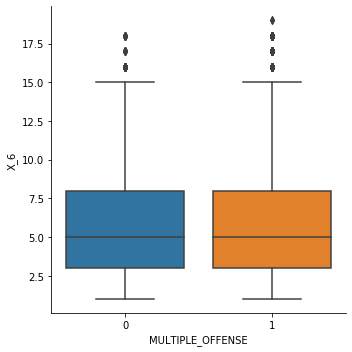

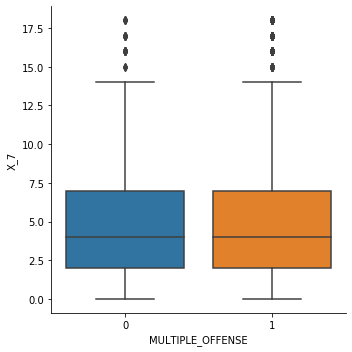

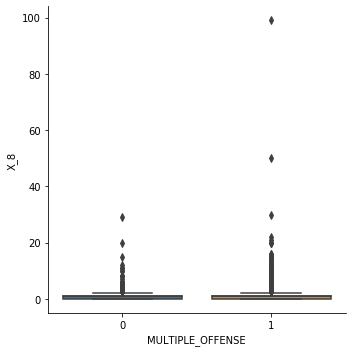

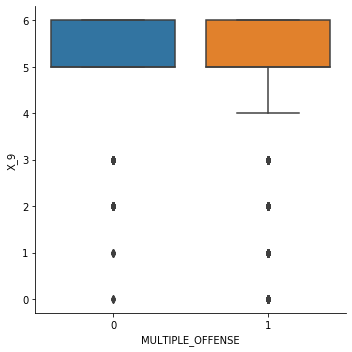

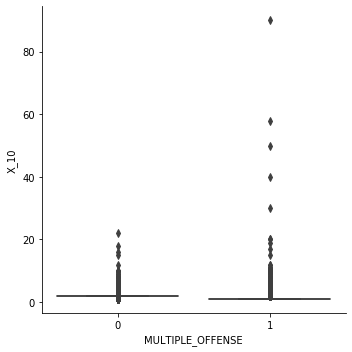

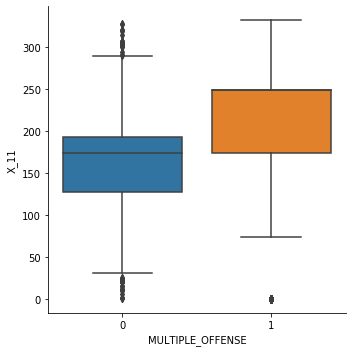

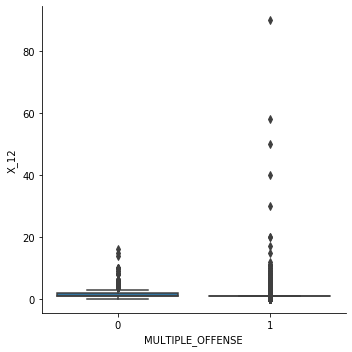

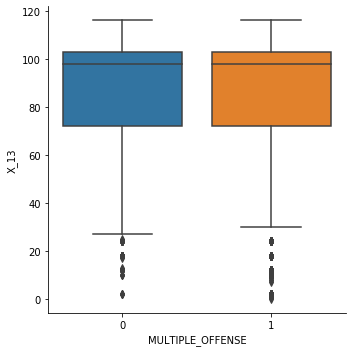

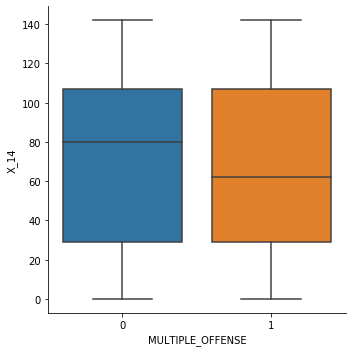

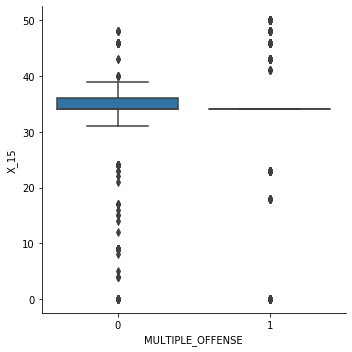

In [28]:
for i in df.iloc[:,2:17].columns:
    sns.catplot(x="MULTIPLE_OFFENSE",y=i, kind="box", data=df)

In [29]:
df.columns

Index(['INCIDENT_ID', 'DATE', 'X_1', 'X_2', 'X_3', 'X_4', 'X_5', 'X_6', 'X_7',
       'X_8', 'X_9', 'X_10', 'X_11', 'X_12', 'X_13', 'X_14', 'X_15',
       'MULTIPLE_OFFENSE', 'MONTH', 'DAY'],
      dtype='object')

#### Lets impute with KNN model to treat null's

In [30]:
from sklearn.impute import KNNImputer

In [31]:
df.columns

Index(['INCIDENT_ID', 'DATE', 'X_1', 'X_2', 'X_3', 'X_4', 'X_5', 'X_6', 'X_7',
       'X_8', 'X_9', 'X_10', 'X_11', 'X_12', 'X_13', 'X_14', 'X_15',
       'MULTIPLE_OFFENSE', 'MONTH', 'DAY'],
      dtype='object')

In [32]:
df1=df.iloc[:,2:18]

In [33]:
imputer = KNNImputer(n_neighbors=3)
X=imputer.fit_transform(df1)

In [34]:
df=pd.DataFrame(X)

In [35]:
df.isnull().sum()

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
dtype: int64

In [36]:
df.columns=['X_1', 'X_2', 'X_3', 'X_4', 'X_5', 'X_6', 'X_7',
       'X_8', 'X_9', 'X_10', 'X_11', 'X_12', 'X_13', 'X_14', 'X_15',
       'MULTIPLE_OFFENSE']

In [37]:
#df.info()

In [38]:
df.head()

,X_1,X_2,X_3,X_4,X_5,X_6,X_7,X_8,X_9,X_10,X_11,X_12,X_13,X_14,X_15,MULTIPLE_OFFENSE
0,0.0,36.0,34.0,2.0,1.0,5.0,6.0,1.0,6.0,1.0,174.0,1.0,92.0,29.0,36.0,0.0
1,1.0,37.0,37.0,0.0,0.0,11.0,17.0,1.0,6.0,1.0,236.0,1.0,103.0,142.0,34.0,1.0
2,0.0,3.0,2.0,3.0,5.0,1.0,0.0,2.0,3.0,1.0,174.0,1.0,110.0,93.0,34.0,1.0
3,0.0,33.0,32.0,2.0,1.0,7.0,1.0,1.0,6.0,1.0,249.0,1.0,72.0,29.0,34.0,1.0
4,0.0,33.0,32.0,2.0,1.0,8.0,3.0,0.0,5.0,1.0,174.0,0.0,112.0,29.0,43.0,1.0


In [39]:
df.isnull().sum()

X_1                 0
X_2                 0
X_3                 0
X_4                 0
X_5                 0
X_6                 0
X_7                 0
X_8                 0
X_9                 0
X_10                0
X_11                0
X_12                0
X_13                0
X_14                0
X_15                0
MULTIPLE_OFFENSE    0
dtype: int64

In [40]:
from sklearn.model_selection import train_test_split

In [41]:
from sklearn.preprocessing import LabelEncoder
le= LabelEncoder()

In [42]:
df.head()

,X_1,X_2,X_3,X_4,X_5,X_6,X_7,X_8,X_9,X_10,X_11,X_12,X_13,X_14,X_15,MULTIPLE_OFFENSE
0,0.0,36.0,34.0,2.0,1.0,5.0,6.0,1.0,6.0,1.0,174.0,1.0,92.0,29.0,36.0,0.0
1,1.0,37.0,37.0,0.0,0.0,11.0,17.0,1.0,6.0,1.0,236.0,1.0,103.0,142.0,34.0,1.0
2,0.0,3.0,2.0,3.0,5.0,1.0,0.0,2.0,3.0,1.0,174.0,1.0,110.0,93.0,34.0,1.0
3,0.0,33.0,32.0,2.0,1.0,7.0,1.0,1.0,6.0,1.0,249.0,1.0,72.0,29.0,34.0,1.0
4,0.0,33.0,32.0,2.0,1.0,8.0,3.0,0.0,5.0,1.0,174.0,0.0,112.0,29.0,43.0,1.0


In [43]:
#Feature Selection

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
from sklearn.feature_selection import f_classif

X = df.iloc[:,0:15] #independent columns
y = df.iloc[:,15:16]

bestfeatures = SelectKBest(score_func= f_classif, k=10)
fit = bestfeatures.fit(X,y)

dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Features','Score']  #naming the dataframe columns

featureScores

C:\Users\A801518\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


,Features,Score
0,X_1,4.698824
1,X_2,17.782549
2,X_3,17.684310
3,X_4,0.203579
4,X_5,0.283907
5,X_6,1.489952
6,X_7,1.540444
7,X_8,26.635719
8,X_9,0.013363
9,X_10,1491.658800


In [44]:
#lets take this columns

In [45]:
features= df[['X_2','X_8','X_10','X_11','X_12','X_15']]
target = df['MULTIPLE_OFFENSE']

In [46]:
features.head()

,X_2,X_8,X_10,X_11,X_12,X_15
0,36.0,1.0,1.0,174.0,1.0,36.0
1,37.0,1.0,1.0,236.0,1.0,34.0
2,3.0,2.0,1.0,174.0,1.0,34.0
3,33.0,1.0,1.0,249.0,1.0,34.0
4,33.0,0.0,1.0,174.0,0.0,43.0


#### Feature Engineering

In [47]:
from imblearn.over_sampling import SMOTE
#pip update scikit-learn

C:\Users\A801518\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [48]:
#pip install -U imbalanced-learn

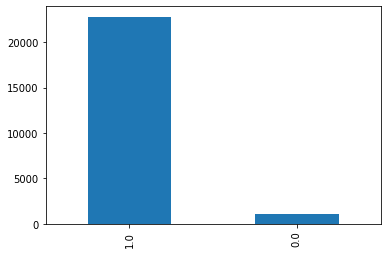

In [49]:
df["MULTIPLE_OFFENSE"].value_counts().plot(kind="bar")

In [50]:
# There's a unbalance samaple on target, Lets upsample the minority target samples

In [51]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.30, random_state=45)

In [52]:

from imblearn.over_sampling import SMOTE
sm = SMOTE(sampling_strategy = 1 ,k_neighbors = 5, random_state=1)   #Synthetic Minority Over Sampling Technique
X_train_res, y_train_res = sm.fit_sample(X_train, y_train.ravel())

## Random Forest

In [53]:
from sklearn.ensemble import RandomForestClassifier

In [217]:
rf = RandomForestClassifier(n_estimators=3000)
rf.fit(X_train_res, y_train_res)

RandomForestClassifier(n_estimators=3000)

In [218]:
pred = rf.predict(X_test)

In [59]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score

In [220]:
confusion_matrix(y_test, pred)

array([[ 306,   12],
       [  14, 6825]], dtype=int64)

In [221]:
recall_score(y_test, pred)

0.9979529170931423

# XG Boost

In [54]:
#!pip install XGboost
from xgboost import XGBClassifier

C:\Users\A801518\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [55]:
xg = XGBClassifier(silent=False, 
                      scale_pos_weight=1,
                      learning_rate=0.01,  
                      colsample_bytree = 0.4,
                      subsample = 0.8,
                      objective='binary:logistic', 
                      n_estimators=2500, 
                      reg_alpha = 0.1,
                      max_depth=5, 
                      gamma=10)
xg.fit(X_train_res, y_train_res)

[14:23:02] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.4, gamma=10, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.01, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=2500, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0.1, reg_lambda=1, scale_pos_weight=1, silent=False,
              subsample=0.8, tree_method='exact', validate_parameters=1,
              verbosity=None)

In [56]:
pred_xg = xg.predict(X_test)

In [60]:
confusion_matrix(y_test, pred_xg)

array([[ 318,    0],
       [  14, 6825]], dtype=int64)

In [61]:
recall_score(y_test, pred_xg)

0.9979529170931423

## Training with whole data

In [76]:
#smote

In [62]:

from imblearn.over_sampling import SMOTE
sm = SMOTE(sampling_strategy = 1 ,k_neighbors = 5, random_state=1)   #Synthetic Minority Over Sampling Technique
X_train_s, y_train_m = sm.fit_sample(features, target.ravel())

In [63]:
features.shape, X_train_s.shape

((23856, 6), (45576, 6))

In [64]:
xg = XGBClassifier(silent=False, 
                      scale_pos_weight=1,
                      learning_rate=0.01,  
                      colsample_bytree = 0.4,
                      subsample = 0.8,
                      objective='binary:logistic', 
                      n_estimators=3000, 
                      reg_alpha = 0.1,
                      max_depth=4, 
                      gamma=10)
xg.fit(X_train_s, y_train_m)

[14:24:05] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.4, gamma=10, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.01, max_delta_step=0, max_depth=4,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=3000, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0.1, reg_lambda=1, scale_pos_weight=1, silent=False,
              subsample=0.8, tree_method='exact', validate_parameters=1,
              verbosity=None)

# Test data part

In [65]:
test = pd.read_csv('Test.csv')
g=test

In [66]:
test.head()

,INCIDENT_ID,DATE,X_1,X_2,X_3,X_4,X_5,X_6,X_7,X_8,X_9,X_10,X_11,X_12,X_13,X_14,X_15
0,CR_195453,01-FEB-18,0,30,35,7,3,6,4,0,5,1,174,NaN,72,119,23
1,CR_103520,05-MAR-04,0,44,44,1,3,7,1,4,6,1,316,0.0,12,29,34
2,CR_196089,27-JAN-18,0,34,33,3,5,2,7,3,0,1,316,1.0,72,0,34
3,CR_112195,18-AUG-06,7,3,2,3,5,9,8,0,5,1,174,1.0,112,87,34
4,CR_149832,31-OCT-11,0,7,8,7,3,2,7,1,5,1,174,0.0,112,93,43


In [67]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15903 entries, 0 to 15902
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   INCIDENT_ID  15903 non-null  object 
 1   DATE         15903 non-null  object 
 2   X_1          15903 non-null  int64  
 3   X_2          15903 non-null  int64  
 4   X_3          15903 non-null  int64  
 5   X_4          15903 non-null  int64  
 6   X_5          15903 non-null  int64  
 7   X_6          15903 non-null  int64  
 8   X_7          15903 non-null  int64  
 9   X_8          15903 non-null  int64  
 10  X_9          15903 non-null  int64  
 11  X_10         15903 non-null  int64  
 12  X_11         15903 non-null  int64  
 13  X_12         15776 non-null  float64
 14  X_13         15903 non-null  int64  
 15  X_14         15903 non-null  int64  
 16  X_15         15903 non-null  int64  
dtypes: float64(1), int64(14), object(2)
memory usage: 2.1+ MB


In [68]:
test.isnull().sum()

INCIDENT_ID      0
DATE             0
X_1              0
X_2              0
X_3              0
X_4              0
X_5              0
X_6              0
X_7              0
X_8              0
X_9              0
X_10             0
X_11             0
X_12           127
X_13             0
X_14             0
X_15             0
dtype: int64

In [69]:
test.shape

(15903, 17)

In [70]:
df2=test.iloc[:,2:]

In [71]:
df2.columns

Index(['X_1', 'X_2', 'X_3', 'X_4', 'X_5', 'X_6', 'X_7', 'X_8', 'X_9', 'X_10',
       'X_11', 'X_12', 'X_13', 'X_14', 'X_15'],
      dtype='object')

In [72]:
imputer = KNNImputer(n_neighbors=3)


In [73]:
X1=imputer.fit_transform(df2)

In [74]:
f=pd.DataFrame(X1)
f.columns=['X_1', 'X_2', 'X_3', 'X_4', 'X_5', 'X_6', 'X_7', 'X_8', 'X_9', 'X_10',
       'X_11', 'X_12', 'X_13', 'X_14', 'X_15']

In [75]:
f.shape

(15903, 15)

In [76]:
test=f

In [77]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15903 entries, 0 to 15902
Data columns (total 15 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X_1     15903 non-null  float64
 1   X_2     15903 non-null  float64
 2   X_3     15903 non-null  float64
 3   X_4     15903 non-null  float64
 4   X_5     15903 non-null  float64
 5   X_6     15903 non-null  float64
 6   X_7     15903 non-null  float64
 7   X_8     15903 non-null  float64
 8   X_9     15903 non-null  float64
 9   X_10    15903 non-null  float64
 10  X_11    15903 non-null  float64
 11  X_12    15903 non-null  float64
 12  X_13    15903 non-null  float64
 13  X_14    15903 non-null  float64
 14  X_15    15903 non-null  float64
dtypes: float64(15)
memory usage: 1.8 MB


In [78]:
#Extracting Month from given Date

#test['MONTH'] = test.DATE.dt.month

In [79]:
#Extracting Day of the week from given Date

#test['DAY'] = test.DATE.dt.weekday

In [80]:
#test['DAY']= le.fit_transform(test['DAY'])

In [81]:
test1 = test[['X_2','X_8','X_10','X_11','X_12','X_15']]

In [82]:
#test1['mean'] = test1.mean(axis=1)
#test1['std'] = test1.std(axis=1)
#test1['skew'] = test1.skew(axis=1)
#test1['kurt'] = test1.kurtosis(axis=1)
#test1['median'] =test1.median(axis=1)

In [83]:
test1.shape , g.shape

((15903, 6), (15903, 17))

In [84]:
pred_test = xg.predict(test1)

In [85]:
submission = pd.DataFrame({"INCIDENT_ID": g.INCIDENT_ID.values})
submission["MULTIPLE_OFFENSE"] = pred_test

In [86]:
submission["MULTIPLE_OFFENSE"].value_counts()

1.0    15157
0.0      746
Name: MULTIPLE_OFFENSE, dtype: int64

In [87]:
submission.to_csv("submission501.csv", index=False)